# Multiclass SVM classification with sklearn

Using suport vector machine classification (from sklearn library) with different kernel functions, as a benchmark before implementing our own multiclass SVM classification. For evaluation of our models, for comparing with custom one, we will be using confusion matrix (accuracy, micro and macro F1-measure).

### Importing dataset

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing cleaned dataset with apartments for sale in Belgrade
dataset = pd.read_csv('../../database/backup/belgrade_flats.csv')
dataset.head()

,price,location_city,location_city_district,area_property,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms
0,109000.0,beograd,stari grad,71.0,9.0,7.0,False,Centralno,2.0,1.0
1,149500.0,beograd,stari grad,74.0,4.0,2.0,True,Centralno,3.0,1.0
2,108000.0,beograd,zvezdara,60.0,4.0,3.0,False,Etažno,2.5,1.0
3,145000.0,beograd,vracar,96.0,2.0,1.0,True,Etažno,4.5,1.0
4,180000.0,beograd,palilula,94.0,5.0,4.0,True,Centralno,4.0,1.0


### Preparing data for modeling

In [3]:
def determine_category(price):
    """Returns category based on a price e.g. cheap, affordable, expensive - expressed by ascending numbers category."""
    if price < 50000:
        return 0
    elif price >= 50000 and price < 100000:
        return 1
    elif price >= 100000 and price < 150000:
        return 2
    elif price >= 150000 and price < 200000:
        return 3
    elif price >= 200000:
        return 4

In [4]:
# Creating new column - categories (based on price segment)
dataset['price'] = dataset['price'].apply(determine_category)

In [5]:
# Price segment (category) distribution
dataset['price'].value_counts()

1    1224
2     915
4     667
0     489
3     448
Name: price, dtype: int64

Text(0, 0.5, 'Number of flats')

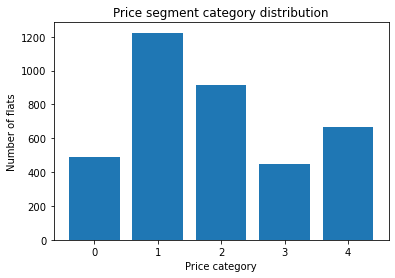

In [6]:
# Visualizing category distribution
plt.bar(dataset['price'].value_counts().index, dataset['price'].value_counts().values)
plt.title('Price segment category distribution')
plt.xlabel('Price category')
plt.ylabel('Number of flats')

In [7]:
# Removing columns that aren't going to be used in classification models
dataset = dataset.drop(columns=['location_city',])
dataset.head()

,price,location_city_district,area_property,num_floors_building,apartment_floor,registered,heating_type,num_rooms,num_bathrooms
0,2,stari grad,71.0,9.0,7.0,False,Centralno,2.0,1.0
1,2,stari grad,74.0,4.0,2.0,True,Centralno,3.0,1.0
2,2,zvezdara,60.0,4.0,3.0,False,Etažno,2.5,1.0
3,2,vracar,96.0,2.0,1.0,True,Etažno,4.5,1.0
4,3,palilula,94.0,5.0,4.0,True,Centralno,4.0,1.0


In [8]:
# Splitting dataset into features (input values) and output value 
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [9]:
# Encocding catgorical variables:
# 1. City district/municipality
# 2. Heating type

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
# Splitting dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.tolist(), y, test_size = 0.2, random_state = 0)

# Multiclass SVM models

In this section we will be training and evaluating SVM models with various kernel functions. For all of the functionalities, we will be using sklearn.

## SVM with RBF kernel function

In [11]:
# Fitting classifier to the Training set
from sklearn.svm import SVC

classifier = SVC(C=100000, kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=100000, random_state=0)

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 51,  30,  10,   1,   1],
       [ 20, 174,  53,   5,   1],
       [  1,  54, 109,  16,   3],
       [  0,   6,  28,  30,  21],
       [  0,   2,   8,  17, 108]], dtype=int64)

In [14]:
# Calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.630173564753004

In [15]:
# Calculating macro-F1 measure
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.6077662347468992

In [16]:
# Calculating micro-F1 measure
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.630173564753004

## SVM with Linear kernel function

In [17]:
# Fitting classifier to the Training set
from sklearn.svm import SVC

classifier = SVC(C=100, kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=0)

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [19]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 45,  35,  11,   0,   2],
       [ 26, 164,  59,   3,   1],
       [  1,  63,  97,  10,  12],
       [  0,  11,  30,  12,  32],
       [  0,   0,   8,   4, 123]], dtype=int64)

In [20]:
# Calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5887850467289719

In [21]:
# Calculating macro-F1 measure
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.5372224765559783

In [22]:
# Calculating micro-F1 measure
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.5887850467289719

## SVM with Polynomial kernel function

In [23]:
# Fitting classifier to the Training set
from sklearn.svm import SVC

classifier = SVC(C=10000, kernel='poly', degree=2, random_state=0)
classifier.fit(X_train, y_train)

SVC(C=10000, degree=2, kernel='poly', random_state=0)

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test) 

In [25]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 46,  39,   5,   2,   1],
       [ 24, 188,  37,   4,   0],
       [  1,  76,  84,  14,   8],
       [  0,   9,  32,  22,  22],
       [  1,   1,   9,  12, 112]], dtype=int64)

In [26]:
# Calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6034712950600801

In [27]:
# Calculating macro-F1 measure
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.5648377739825488

In [28]:
# Calculating micro-F1 measure
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.6034712950600801